<a href="https://colab.research.google.com/github/ViktoriaBekhter/Python/blob/main/%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,7

In [ ]:
df = pd.read_csv('russian_demography.csv')
print(df.shape)

(2380, 7)


<ipython-input-10-4610b3598f69>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.birth_rate)


<Axes: xlabel='birth_rate', ylabel='Density'>

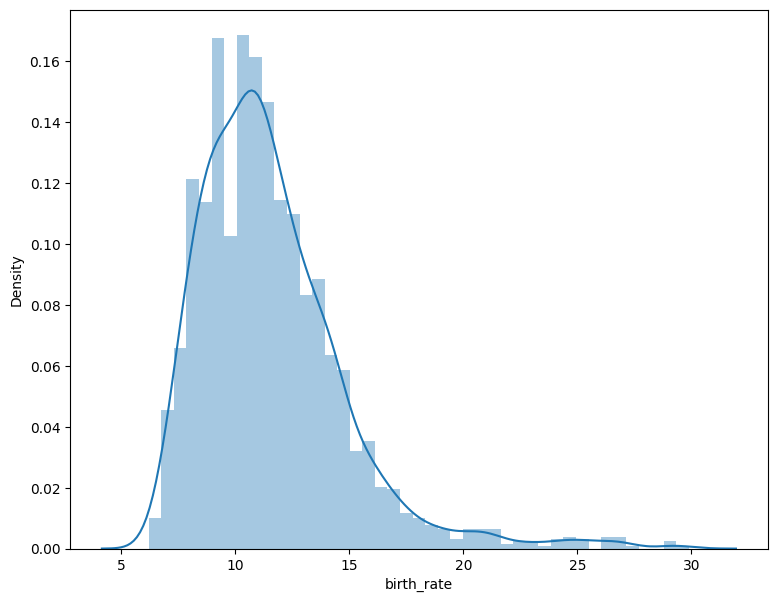

In [ ]:
sns.distplot(df.birth_rate)

На основе построенной диаграммы на основе распределения рождаемости в России можно сказать, что плотность населения напрямую влияет на рождаемость. Чем больше  плотность населения, тем выше рождаемость.

<Axes: ylabel='npg'>

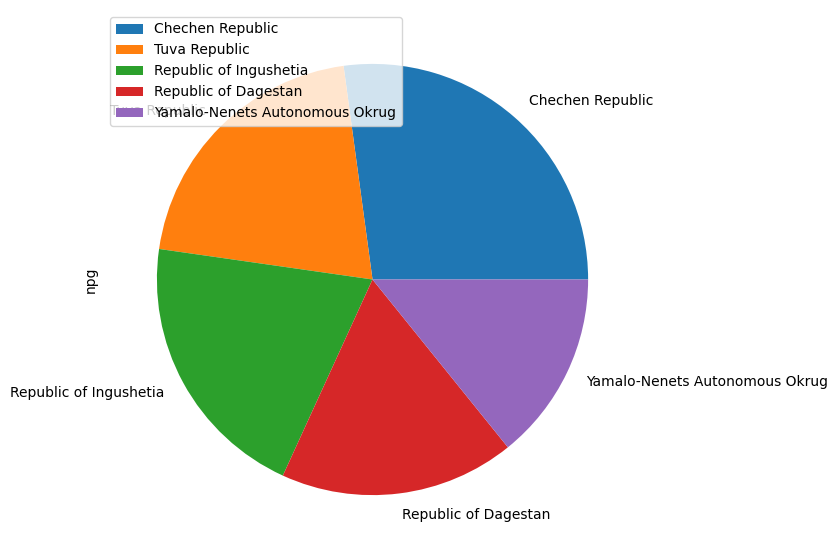

In [ ]:
top5_npg_regions = df[df["year"]==2017][["region","npg"]].sort_values('npg',ascending=False).head(5)
top5_npg_regions.plot(kind='pie', y='npg',labels=top5_npg_regions["region"])

Данная диграмма построена на основе 5-и регионов по уровню естесвенного прироста населения на 1000 человек. Наивысший коэффициент естественного прироста мы можем наблюдать в Чеченской республике.

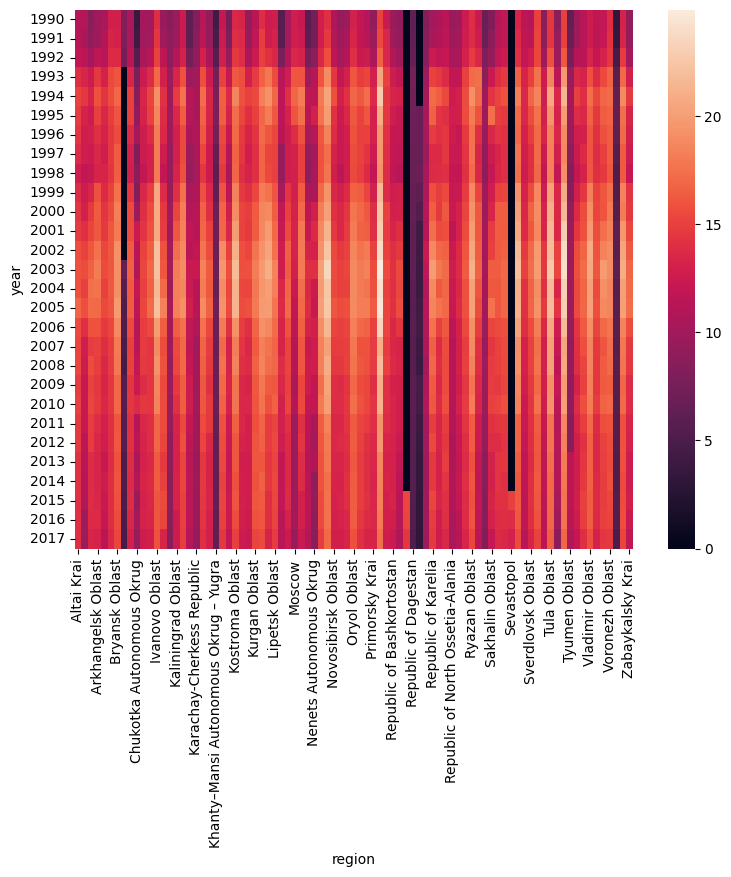

In [ ]:
annual_death_rate = df.pivot_table(
                        index='year',
                        columns='region',
                        values='death_rate',
                        aggfunc=sum).fillna(0).applymap(float)

annual_death_rate
ax = sns.heatmap(annual_death_rate)

Данная диаграмма построена на основе годовой смертности по регионам (количество смертей на 1000 человек). Судя по ней, можно сказать, что наименьший уровень смертности приходится на регионы Кавказа. Наибольшая же смертность населения приходится на центральные регионы страны.

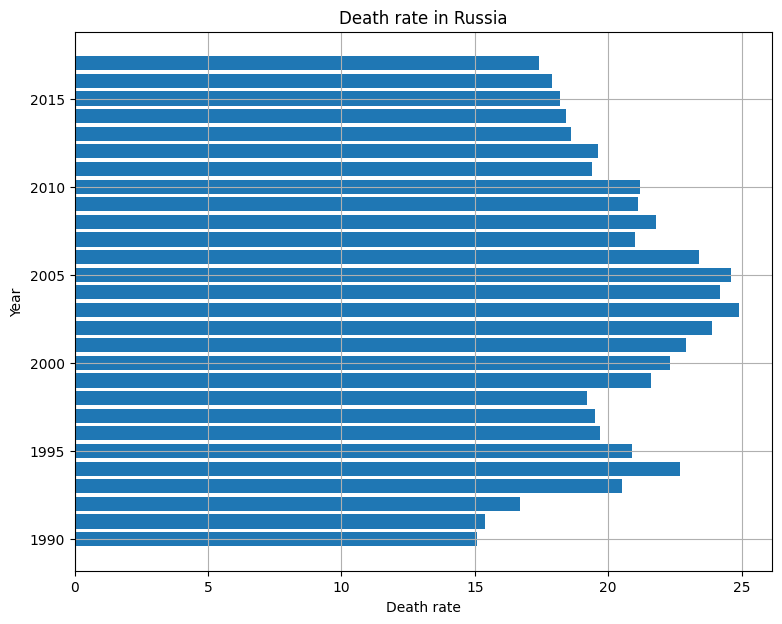

In [ ]:
plt.barh(df["year"],df["death_rate"])
plt.xlabel('Death rate')
plt.ylabel('Year')
plt.title('Death rate in Russia')
plt.grid()

На построенной диаграмме мы видим уровень смерности в России. Можно сделать вывод, что наибольшая смертность наблюдается в период с 2000 по 2005 год. Высокая смерность так же наблюдается в 1994 году.